In [1]:
import pandas as pd
import numpy as np


In [51]:
file_path = 'data/fm_data/fm24/epl.rtf'

def rtf_file_to_csv(file_path,nlines=None):

    """
    Convert an RTF file to a CSV file by extracting lines of text.
    Parameters:
    file_path (str): The path to the RTF file.
    nlines (int): The number of lines to extract from the RTF file.
    """
    import pandas as pd

    counter = 0
    lines_list = []
    with open(file_path, encoding='utf-8', errors='ignore') as file:
        # Read all the RTF file's content

        text = file.read()
        for l in text.splitlines():
            split= l.split(' | ')
            split = [x.replace('|','').strip() for x in split]  # Remove empty strings

            # Skip every second line as it is part of the formatting of the RTF file and doesn't contain useful data
            if counter %2 == 0:
                lines_list.append(split)

            counter +=1
            if nlines:
                if counter > nlines:
                    break
    file.close()

    df = pd.DataFrame(lines_list)
    df.rename(columns = df.iloc[0], inplace=True)
    df = df[1:]  # Remove the first row which is now the header
    df.reset_index(drop=True, inplace=True)
    df.to_csv(file_path.replace('rtf','csv'), index=False)

rtf_file_to_csv(file_path)

In [52]:
epl = pd.read_csv('data/fm_data/fm24/epl.csv')
epl


,Name,Pick,Round,Drafted Club,Season 2027/28,Season 2026/27,Season 2025/26,Season 2024/25,Asking Price,Agreed Playing Time,...,Potential,Division,Best Pos,Yearly Wage Rise,Short-term Plans,Time Out,Goals,Best Role.3,Actual Playing Time,Unnamed: 207
0,Max Aarons - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,D (R),0%,NaN,-,-,Inverted Wing-Back,-,NaN
1,Adam Abbas - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,ST (C),0%,NaN,-,-,Poacher,-,NaN
2,George Abbott - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,M (C),0%,NaN,-,-,Central Midfielder,-,NaN
3,Zach Abbott - English,NaN,NaN,NaN,-,-,-,Breakthrough Prospect,-,Scouting Required,...,NaN,English Premier Division,D (C),0%,NaN,-,-,Central Defender,-,NaN
4,Dondre Abraham - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,GK,0%,NaN,-,-,Goalkeeper,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Erion Zabeli - Albanian,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,D (C),0%,NaN,-,-,No-Nonsense Centre-Back,-,NaN
1377,Nicolò Zaniolo - Italian,NaN,NaN,NaN,-,-,-,-,-,-,...,NaN,English Premier Division,AM (L),0%,NaN,-,2,Inside Forward,-,NaN
1378,Oleksandr Zinchenko - Ukrainian,NaN,NaN,NaN,-,-,-,-,-,Regular Starter,...,NaN,English Premier Division,D (L),0%,NaN,2 - 8 weeks,8,Complete Wing-Back,-,NaN
1379,Kurt Zouma - French,NaN,NaN,NaN,-,-,-,-,-,Regular Starter,...,NaN,English Premier Division,D (C),0%,NaN,-,1,Wide Centre-Back,-,NaN


In [ ]:
epl['Wage After Tax Per Week GBP'] = epl['Wage After Tax']

In [60]:
epl['Wage After Tax'].str[0].value_counts()

Wage After Tax
£    1378
Name: count, dtype: int64

In [61]:
epl['Wage After Tax'].str[-3:].value_counts()

Wage After Tax
p/w    1378
Name: count, dtype: int64

In [73]:
def get_weekly_wage(wage_column):
    """
    Extract the weekly wage from a string.
    
    Parameters:
    wage_str (str): The wage string.
    
    Returns:
    float: The weekly wage as a float.
    """

    new_wage_column = wage_column.str.replace('£', '')
    new_wage_column = new_wage_column.str.replace(',', '')

    new_wage_column = new_wage_column.str.replace('p/w', '')
    new_wage_column = new_wage_column.str.strip()

    # Remove currency symbols and commas, then convert to float
    return new_wage_column.astype(float)

epl['Wage After Tax Weekly']= get_weekly_wage(epl['Wage After Tax'])
epl['Wage After Tax Weekly']

108     9750.0
919     9750.0
141     9750.0
969     9750.0
62       975.0
         ...  
931     1000.0
984     1000.0
452        NaN
933        NaN
1380       NaN
Name: Wage After Tax Weekly, Length: 1381, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='Frequency'>

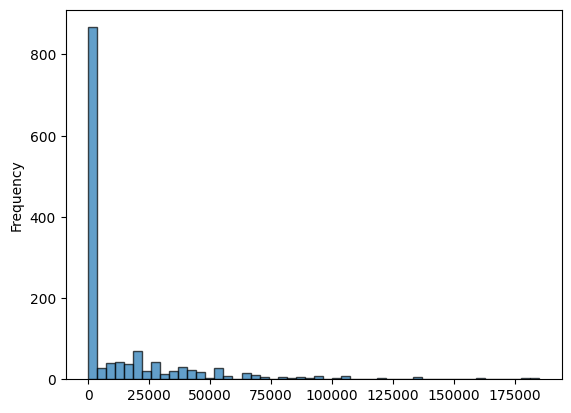

In [75]:
epl['Wage After Tax Weekly'].plot.hist(bins=50, edgecolor='black', alpha=0.7)

In [77]:
epl.sort_values(by='Wage After Tax Weekly', ascending=False, inplace=True)

In [90]:
epl[['AT Apps', 'AT Gls', 'Nat .1']] = np.nan

In [83]:
fm2023 = pd.read_csv('data/fm_data/fm2023.csv')

In [91]:
fm23_cols = fm2023.columns
fm23_cols = [x.strip() for x in fm23_cols]
epl[fm23_cols]

,UID,Inf,Name,DoB,Nat,Division,Club,Based,Preferred Foot,Right Foot,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
1196,28054109,NaN,Raheem Sterling - English,8/12/1994 (28 years old),ENG,English Premier Division,Chelsea,England (Premier Division),Right,Very Strong,...,1,1,18,12,8,14,13,3,13,15
1282,85075627,NaN,Raphaël Varane - French,25/4/1993 (30 years old),FRA,English Premier Division,Man UFC,England (Premier Division),Right,Very Strong,...,1,1,14,15,16,14,12,2,6,12
1120,98028755,NaN,Mohamed Salah - Egyptian,15/6/1992 (31 years old),EGY,English Premier Division,Liverpool,England (Premier Division),Left,Weak,...,2,3,15,15,6,16,17,2,17,16
511,29179241,NaN,Erling Haaland - Norwegian,21/7/2000 (22 years old),NOR,English Premier Division,Man City,England (Premier Division),Left,Reasonable,...,1,1,14,17,7,14,15,2,14,13
318,18004457,Inj,Kevin De Bruyne - Belgian,28/6/1991 (32 years old),BEL,English Premier Division,Man City,England (Premier Division),Right,Very Strong,...,1,1,16,13,9,14,18,2,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2000131014,Yth,Eden Page - English,19/9/2004 (18 years old),ENG,English Premier Division,Newcastle,England (Premier Division),Unknown,-,...,-,-,-,7-14,9-18,-,-,-,-,-
425,2000124285,Yth,Hugo Fisher - Slovak,24/9/2004 (18 years old),SVK,English Premier Division,Brighton,England (Premier Division),Unknown,-,...,11-17,3-12,-,-,-,-,-,2-9,-,-
452,2000231612,IPR,Benjamin Fredrick - Nigerian,28/5/2005 (18 years old),NGA,English Premier Division,Brentford,England (Premier Division),Unknown,-,...,-,-,-,4-13,12-18,-,-,-,-,-
933,2000164703,Yth,- -,24/4/2005 (18 years old),UZB,English Premier Division,Brentford,England (Premier Division),Unknown,-,...,-,-,-,1-5,-,-,11-17,-,-,8-14
